In [1]:
from pathlib import Path
import cv2
import sys
import numpy as np
from skimage import feature, measure
import livecell_tracker
from livecell_tracker.core import datasets
from livecell_tracker.core.datasets import LiveCellImageDataset
import livecell_tracker.segment
from livecell_tracker import core
import livecell_tracker.core.utils
from tqdm import tqdm
import json
from livecell_tracker.core import (
    SingleCellTrajectory,
    SingleCellStatic,
    SingleCellTrajectoryCollection,
)
import livecell_tracker.trajectory.contour.contour_class
traj_collection_json_path = "../datasets/test_data/traj_analysis/track_singleCellTrajectoryCollection.json"
traj_collection_json = json.load(open(traj_collection_json_path, "r"))
trajectory_collection = SingleCellTrajectoryCollection().load_from_json_dict(traj_collection_json)

In [2]:
traj = trajectory_collection.get_trajectory(1)
traj

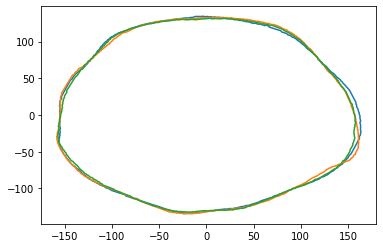

In [3]:
import matplotlib.pyplot as plt
from livecell_tracker.trajectory.contour_utils import get_cellTool_contour_points, viz_contours
contour_num_points = 500
cell_contours = get_cellTool_contour_points(traj, contour_num_points=contour_num_points)

for contour in cell_contours:
    plt.plot(contour.points[:, 0], contour.points[:, 1])
plt.show()

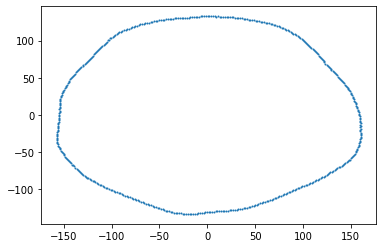

In [4]:
from livecell_tracker.trajectory.contour.cell_contour import align_contours
mean_contour, iters = align_contours(cell_contours, allow_reflection=True, allow_scaling=False, max_iters=20)
plt.scatter(mean_contour.points[:, 0], mean_contour.points[:, 1], s=1)
plt.show()

In [5]:
cell_contours[0].to_world_transform

array([[ 4.01605462e-01, -9.15812783e-01,  0.00000000e+00],
       [ 9.15812783e-01,  4.01605462e-01,  0.00000000e+00],
       [ 1.43014839e+03,  1.32630430e+03,  1.00000000e+00]])

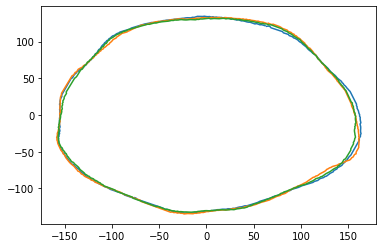

In [6]:
viz_contours(cell_contours)

### Scale contours and how to scale back using world coordinates stored in contours

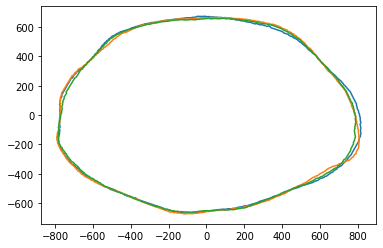

In [7]:
for i in range(len(cell_contours)):
    cell_contours[i].scale(5)
    points = cell_contours[i].points
viz_contours(cell_contours)

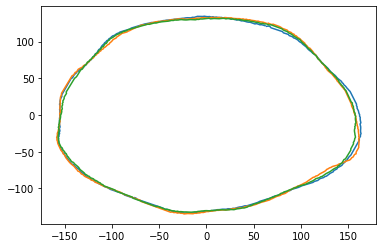

In [8]:
from livecell_tracker.trajectory.contour.contour_class import Contour
from livecell_tracker.trajectory import decompose_homogenous_transform

for i in range(len(cell_contours)):
    scale_back_mat = decompose_homogenous_transform(cell_contours[i].to_world_transform)[1]
    cell_contours[i].scale(scale_back_mat)
    points = cell_contours[i].points

viz_contours(cell_contours)